<a href="https://colab.research.google.com/github/dcabarcase/Vision-Artificial/blob/main/ProyectoVisionSinCamara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install img2pdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 72.9 MB/s eta 0:00:00
  Created wheel for img2pdf: filename=img2pdf-0.4.4-py3-none-any.whl size=44860 sha256=e9150ecc7f64946914882912e5c38ee6826c378808f8e9d84e36bba502fb8449
  Stored in directory: /root/.cache/pip/wheels/0b/85/be/a7faed8033e47e5a653a2502b5494b1d613bcd075c99b8152e
Successfully built img2pdf
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [ ]:
!pip install opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import urllib.request
import numpy as np
from PIL import Image 
import urllib.request
import img2pdf
import tempfile

In [2]:
#IMAGE_URL = 'https://github.com/dcabarcase/Vision-Artificial/blob/main/imagen_2023-04-25_171024705.png?raw=truee'
#IMAGE_URL = 'https://github.com/dcabarcase/Vision-Artificial/blob/main/imagen_2023-05-01_143215342.png?raw=true'
#IMAGE_URL = 'https://github.com/dcabarcase/Vision-Artificial/blob/main/imagen_2023-05-01_202841466.png?raw=true'  
IMAGE_URL = 'https://github.com/dcabarcase/Vision-Artificial/blob/main/imagen_2023-05-02_164955797.png?raw=true'
im = io.imread(IMAGE_URL) 
def filtrado_inicial(im):
    imgray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) #Poner la imagen en escala de grises
    imfil = cv2.GaussianBlur(imgray, (5,5), 0) #filtro Gaussiano para suavizar la imagen y reducir el ruido 
    return imfil

In [3]:
def preumbral():
    imfil=filtrado_inicial(im)
    (T, threshImg) = cv2.threshold(imfil, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU) #Metodo de OTSU
    imumbral1 = threshImg.copy()
    kernel = np.ones((3,3),np.uint8)
    erosion1 = cv2.erode(imumbral1,kernel,iterations = 4)
    dilation1 = cv2.dilate(erosion1,kernel,iterations = 1)  
    return dilation1

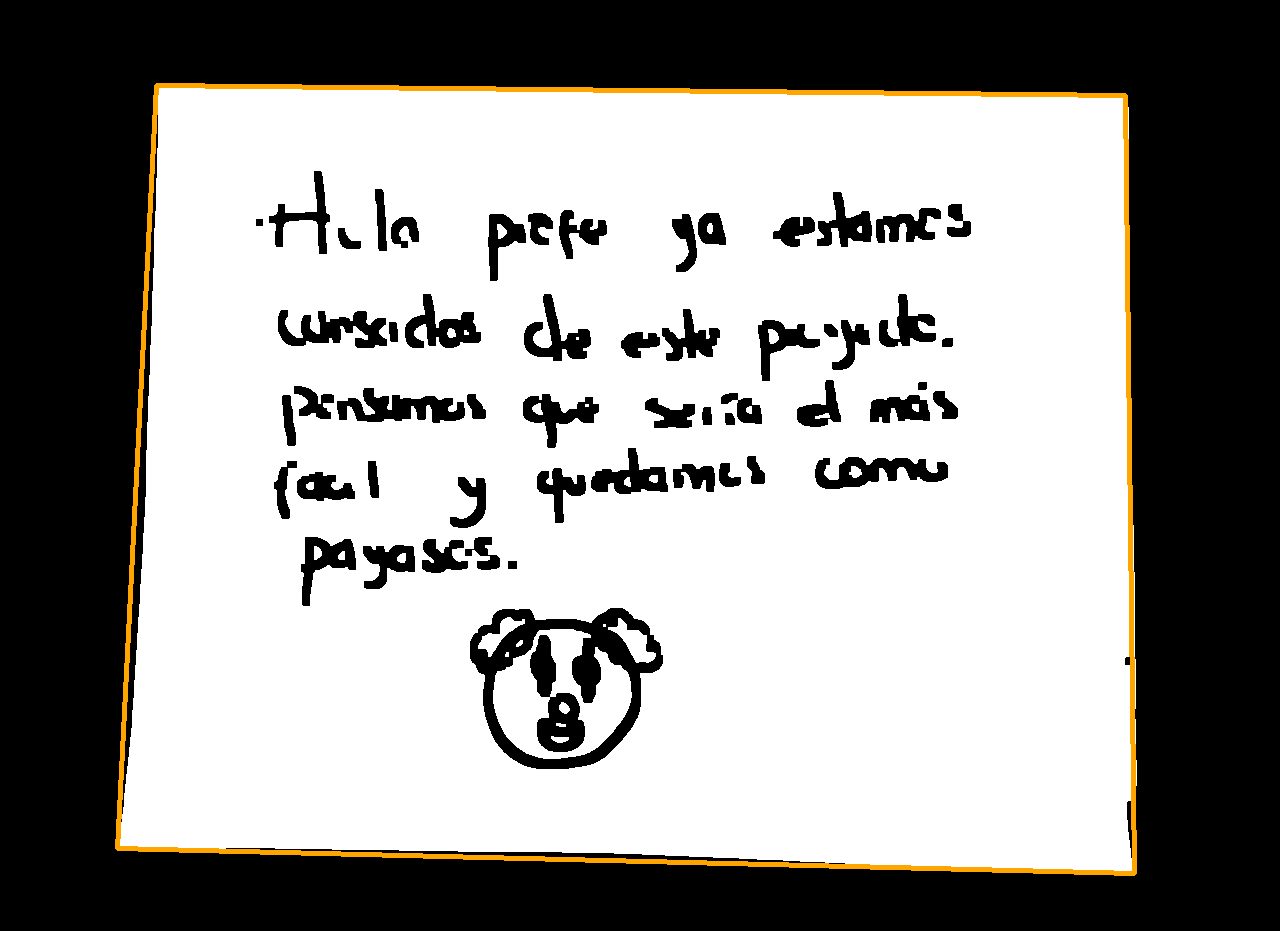

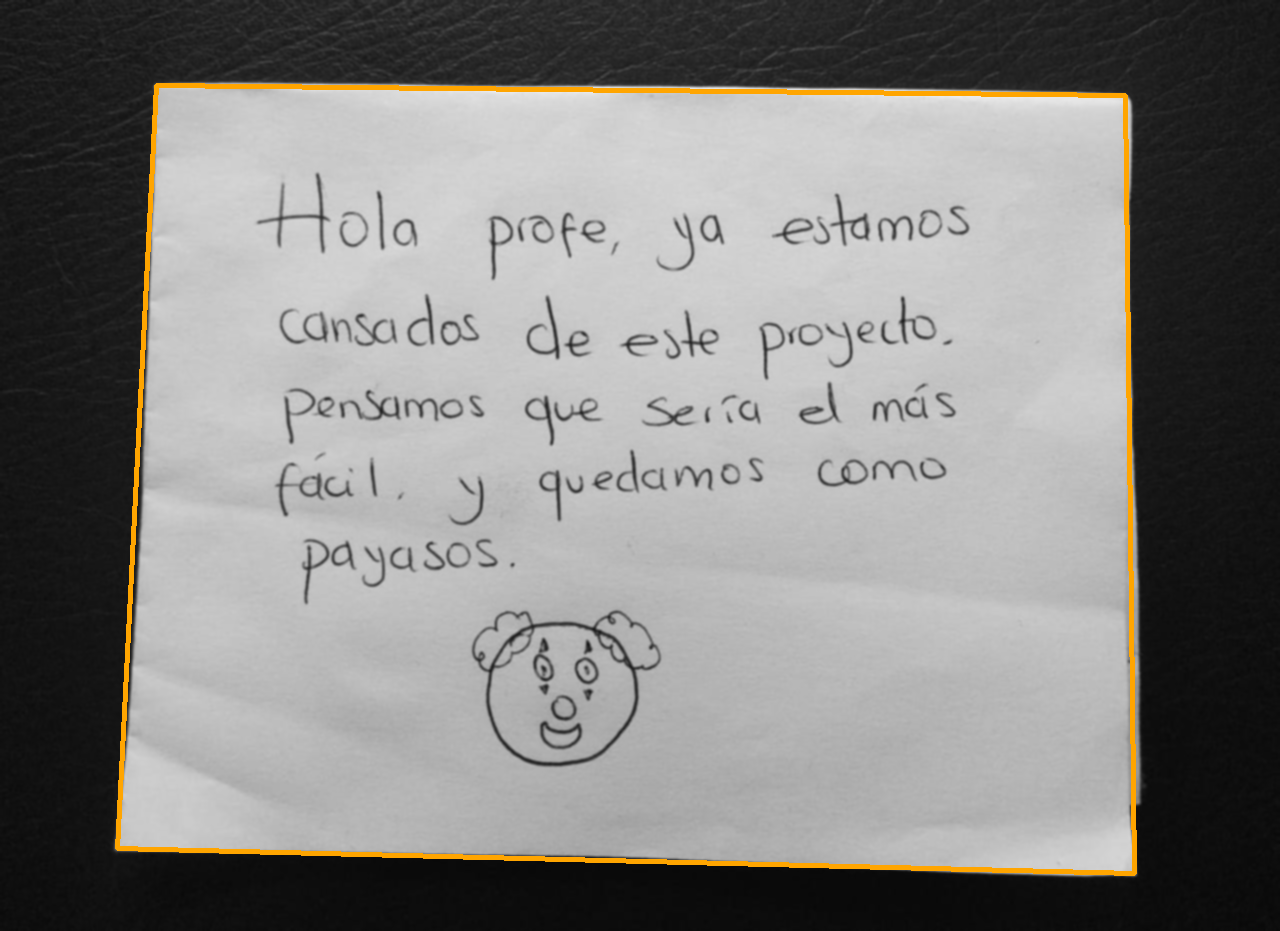

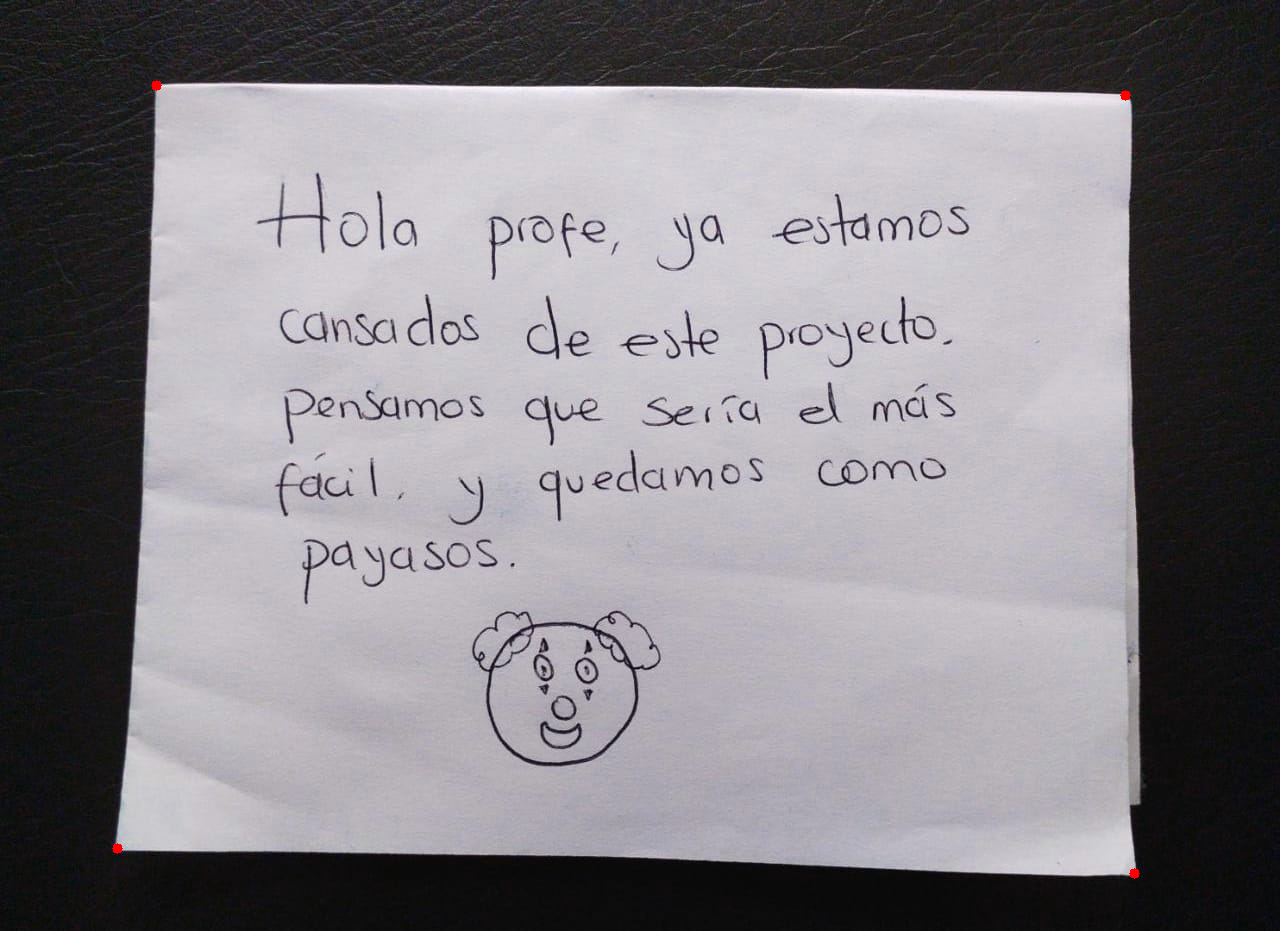

Coordenadas de las esquinas (Ancho, Alto):
Top Left: (156, 85)
Top Right: (1125, 95)
Bottom Left: (117, 848)
Bottom Right: (1134, 873)


In [4]:
#Bordes
dilation1 = preumbral()
img = cv2.cvtColor(dilation1, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(img, 50, 200)
# Aplicar dilatación para cerrar huecos en los bordes
kernel = np.ones((5,5), np.uint8)
dilationx = cv2.dilate(canny, kernel, iterations=1)
# Encontrar contornos de la imagen
contours, hierarchy = cv2.findContours(dilationx, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Ordenar contornos por área y seleccionar el mayor
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]
# Aproximar contorno seleccionado a un polígono con 4 esquinas
approx = cv2.approxPolyDP(contours[0], 0.01 * cv2.arcLength(contours[0], True), True)
# Dibujar polígono en la imagen original
cv2.drawContours(img, [approx], -1, (0,165,255), 3)
cv2_imshow(img)  
print('\n')
imfil = filtrado_inicial(im)
color = cv2.cvtColor(imfil, cv2.COLOR_BGR2RGB)
cv2.drawContours(color, [approx], -1, (0,165,255), 3)
print('\n')
cv2_imshow(color)
epsilon = 0.02 * cv2.arcLength(contours[0], True)
approx = cv2.approxPolyDP(contours[0], epsilon, True)
# Obtener coordenadas de las esquinas
corner_coords = []
for corner in approx:
    x, y = corner[0]
    corner_coords.append((x, y))
#cv2.drawContours(im, [approx], -1, (0,165,255), 3)
for corner in corner_coords:
    cv2.circle(im, corner, 5, (0, 0, 255), -1)
# Mostrar imagen con contorno y esquinas
print('\n')
cv2_imshow(im)
corner_coords.sort()
top_left = corner_coords[1]
bottom_left = corner_coords[0]
bottom_right = corner_coords[3]
top_right = corner_coords[2]
# Imprimir coordenadas de las esquinas
print("Coordenadas de las esquinas (Ancho, Alto):")
print("Top Left:", top_left)
print("Top Right:", top_right)
print("Bottom Left:", bottom_left)
print("Bottom Right:", bottom_right)
imrecor = im.copy()
    #return top_left, top_right, bottom_left, bottom_right, imrecor

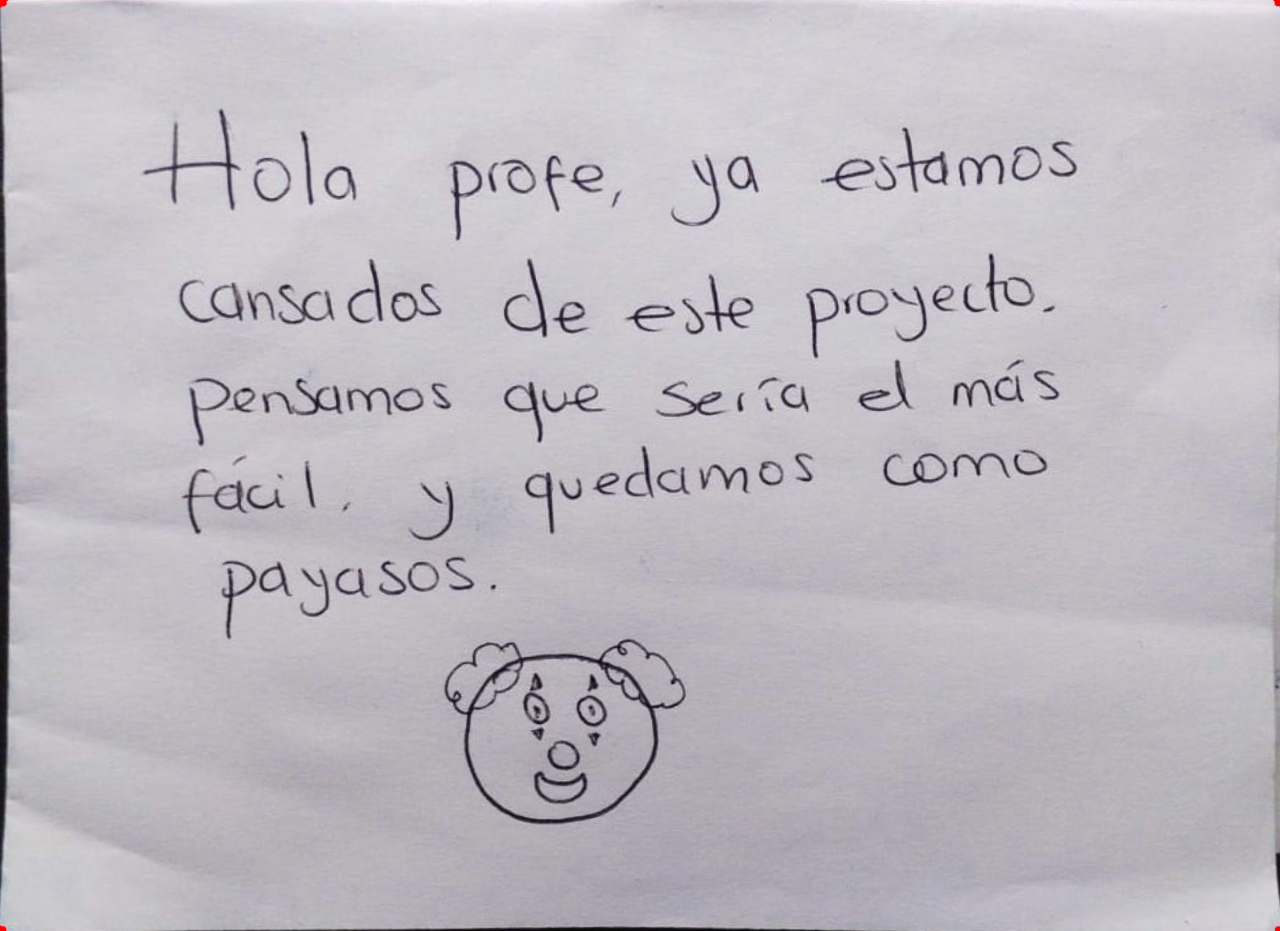

In [5]:
#Recorte
#top_left, top_right, bottom_left, bottom_right, imrecor = bordes()
# Definir las esquinas de la ROI
src = np.float32([[top_left], [top_right], [bottom_left], [bottom_right]])
# Definir las coordenadas de la perspectiva recta
dst = np.float32([[0, 0], [im.shape[1], 0], [0, im.shape[0]], [im.shape[1], im.shape[0]]])
# Calcular la matriz de transformación
M = cv2.getPerspectiveTransform(src, dst)
# Aplicar la transformación a la imagen
output = cv2.warpPerspective(imrecor, M, (im.shape[1], im.shape[0]), flags=cv2.INTER_LINEAR)
# Mostrar la imagen de salida
cv2_imshow(output)
    #return output


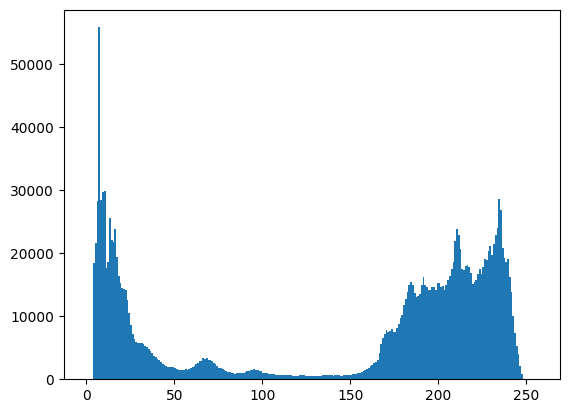

El valor máximo del histograma es: 7


In [ ]:
#@title
def calcular_histograma():
    imfil = filtrado_inicial(im)
    hist = plt.hist(imfil.ravel(), bins=256, range=[0,256])
    plt.show(hist)
    frecuencias = hist[0]
    bins = hist[1]
    valor_max = np.argmax(frecuencias)
    print("El valor máximo del histograma es:", valor_max)
calcular_histograma()

In [6]:
def procesado_imagen():
    #output = perspectiva()
    gris = cv2.cvtColor(output, cv2.COLOR_RGB2GRAY) #Poner la imagen en escala de grises
    imfilf = cv2.GaussianBlur(gris, (5,5), 0) #filtro Gaussiano para suavizar la imagen y reducir el ruido
    #(T, threshImg) = cv2.threshold(imfil, 130, 255, cv2.THRESH_BINARY) #Manual
    #(T, threshImg) = cv2.threshold(imfil, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU) #Metodo de OTSU
    imumbral = cv2.adaptiveThreshold(imfilf, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) #Metodo Gaussiano
    #imumbral = threshImg.copy()
    kernel = np.ones((1,1),np.uint8)
    erosion = cv2.erode(imumbral,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 2)   
    return dilation

In [7]:
def nule_ruido_no_local():
    dilation = procesado_imagen()
    dilation_rgb = cv2.cvtColor(dilation, cv2.COLOR_GRAY2RGB)  # Convertir a formato RGB
    nule = cv2.fastNlMeansDenoisingColored(dilation_rgb, None, 65, 10, 7, 51)  # Aplicar el filtro
    return nule

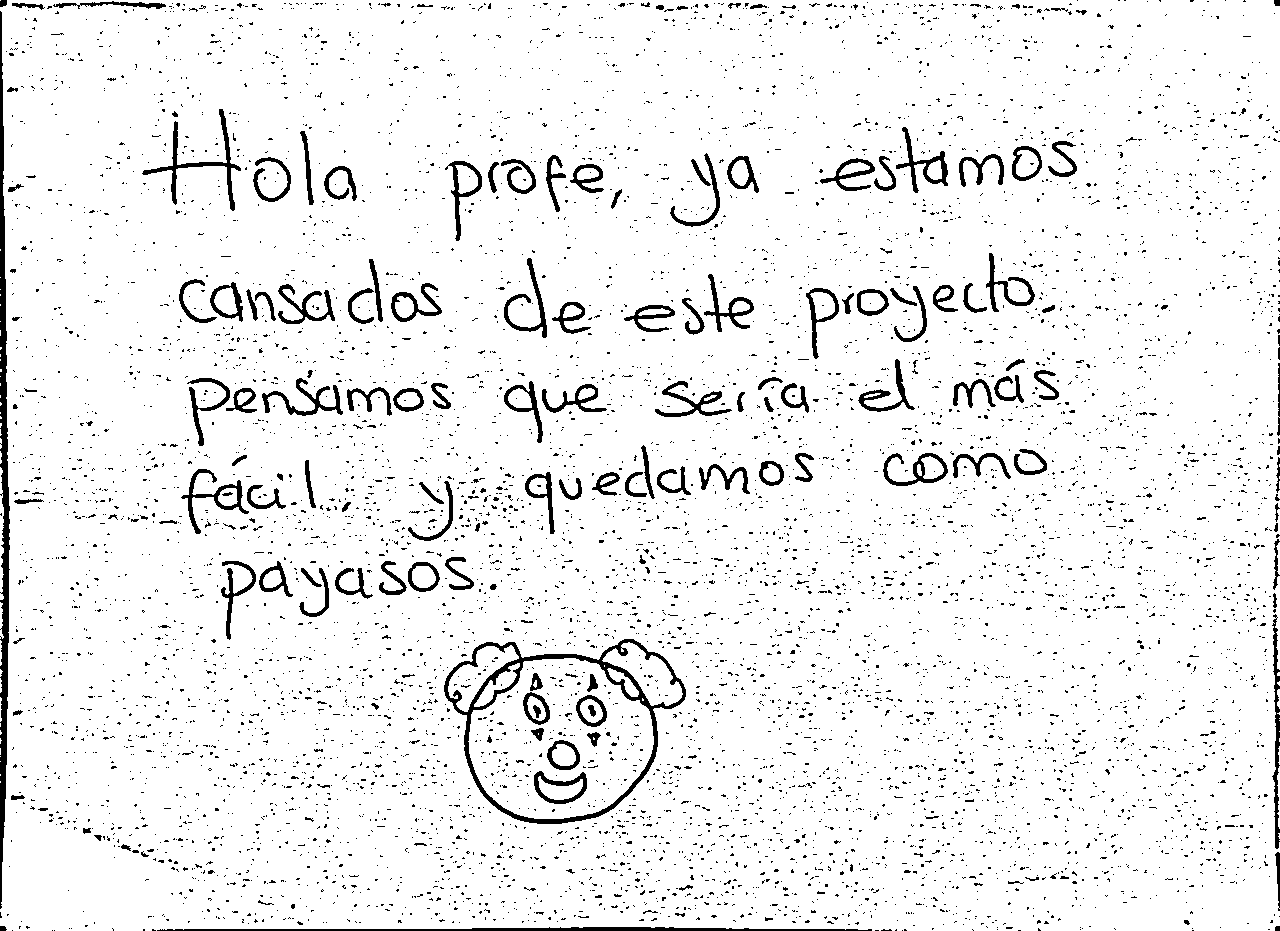

In [8]:
def ver_imscan():
    dilation = procesado_imagen()
    print('\n')
    cv2_imshow(dilation)
ver_imscan()

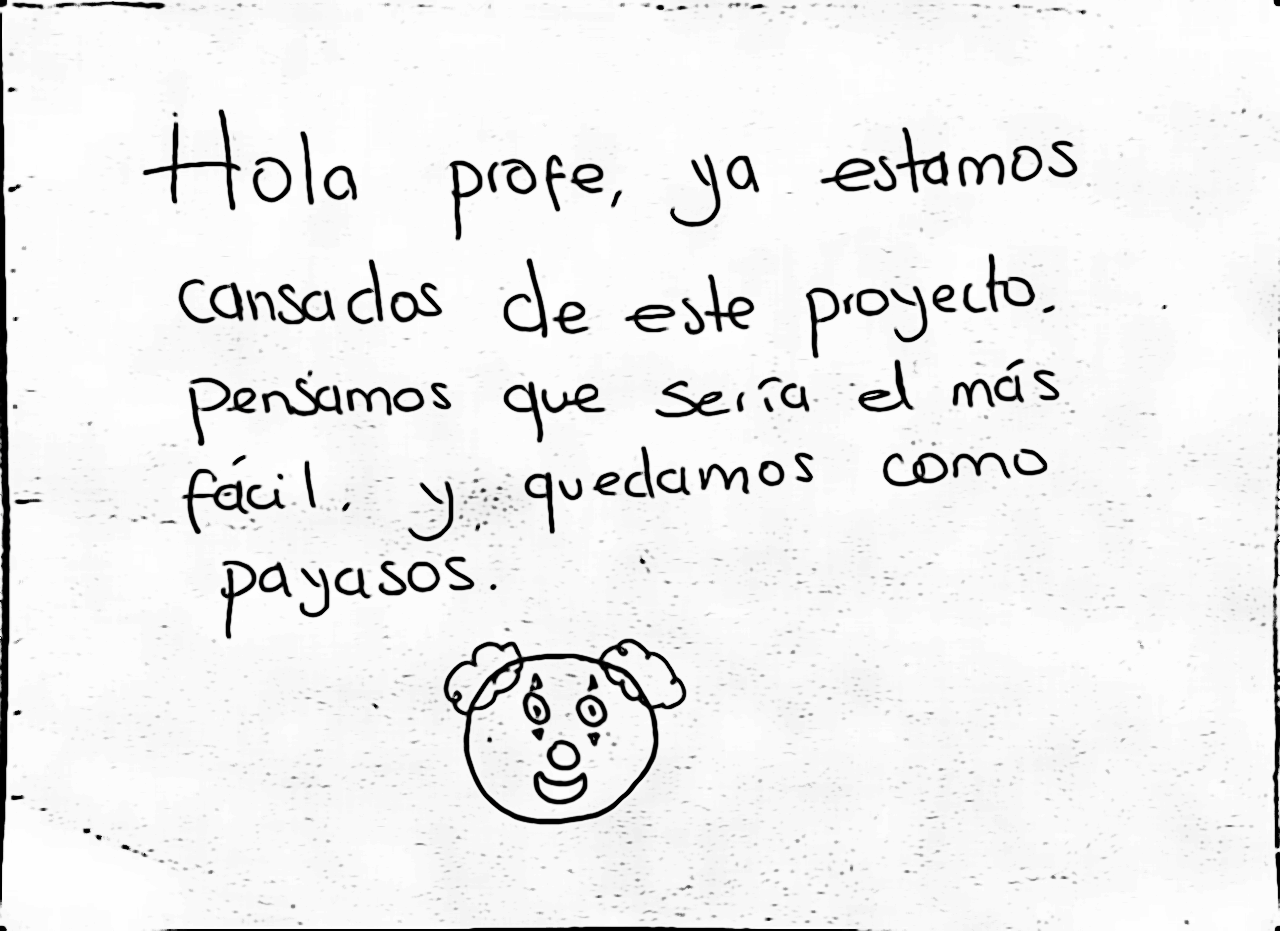

In [9]:
def ver_imscan_nule_ruido():
    nule = nule_ruido_no_local()
    print('\n')
    cv2_imshow(nule)
ver_imscan_nule_ruido()

In [10]:
from google.colab.patches import cv2_imshow

def ver_imscan_mark():
    # Obtener la imagen escaneada
    nule = nule_ruido_no_local()
    
    # Convertir la imagen a RGB
    #rgb_image = cv2.cvtColor(nule, cv2.COLOR_GRAY2RGB)
    
    # Crear una imagen con un recuadro externo blanco
    height, width = nule.shape[:2]
    blank_image = np.zeros((height+50, width+30, 3), np.uint8)
    blank_image[:] = (255, 255, 255)
    blank_image[25:height+25, 25:width+25] = nule
    
    # Agregar texto a la imagen original
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.6
    # Agregar texto a la imagen con el recuadro externo blanco
    cv2.putText(blank_image, 'BOMBSCANNER', (30, height+41), font, fontScale, (0, 0, 0), 2, cv2.LINE_AA)

    # Agregar el recuadro externo blanco
    cv2.rectangle(blank_image, (0, 0), (width+50, height+50), (255, 255, 255), 10)
    return blank_image

In [11]:
def conver_pdf():
    #Impresión de PDF para la imagen escaneada
    nule = ver_imscan_mark()
    imagen_pil = Image.fromarray(nule)  # Convertir a formato PIL
    # Guardar la imagen en un archivo temporal en formato .jpg
    scan_jpg = 'Resultado.png'
    imagen_pil.save(scan_jpg, 'PNG')
    # Convertir la imagen a formato pdf y guardarla en un archivo
    with open('Scaner.pdf', 'wb') as f:
        f.write(img2pdf.convert([scan_jpg], dpi=300))
conver_pdf()

Librería Img2pdf 

*  with open('salida.pdf', 'wb') as f:: Abre un archivo en modo de escritura 
binaria (wb) y crea un objeto de archivo f para manipularlo. El archivo se cierra automáticamente al salir del bloque with.

* f.write(img2pdf.convert([temp_filename], dpi=300)): Convierte la imagen especificada en temp_filename a formato PDF con una resolución de 300 DPI utilizando img2pdf, y escribe el resultado en el archivo f.

Tomado de: img2pdf. (2022, April 7). PyPI. https://pypi.org/project/img2pdf/

‌y 7. Input and Output. (2016). Python Documentation. https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files




---



Transformación de Perspectiva

*   sCode. (2019). Perspective transform using OpenCV C++ [YouTube Video]. In YouTube. https://www.youtube.com/watch?v=ZxFn5-5YLhA&ab_channel=sCode

*   sCode. (2019, May 14). Perspective transformation OpenCV C++. Blogspot.com. https://scode7.blogspot.com/2019/05/perspective-transformation-opencv-c.html

‌


‌
